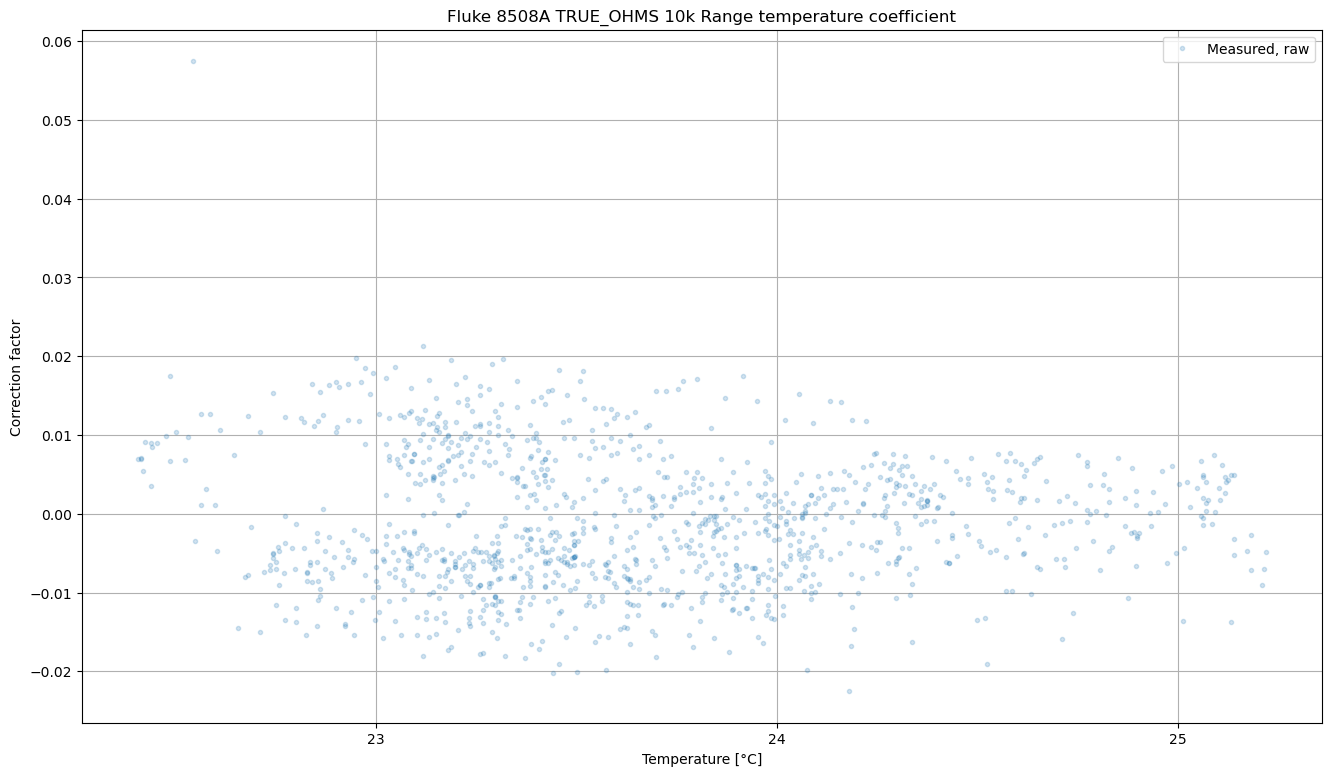

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Chebyshev

df=pd.read_csv('https://raw.githubusercontent.com/marcoreps/resistors/refs/heads/main/csv/742a_10k_another_TCR_sweep_18_23_all_raw.csv', names=['Time', 'temp_ambient', 'temp_chamber', 'F742A_DUT', 'SR104_ambient', 'SR104_thermistor', '742_casing_pt100', 'VHP10k_DUT'], skiprows=1)

# We have one data point per time row, lets merge these into one row every 20m
df['Time'] = pd.to_datetime(df['Time'])
df = df.set_index('Time')
df = df.resample('20min').mean()
df = df.dropna(how='any')

filtered_df = df

# Correcting DMM measurements based on SR104_ambient and SR104_thermistor
SR104_best_guess = 1.00000500E+04
SR104_alpha = -0.04240
SR104_beta = -0.02552
filtered_df['dmm_correction_factor'] = ((SR104_best_guess*(   1.0+(SR104_alpha/1000000.0)*((filtered_df['SR104_thermistor']-10000.0)/10.0) + (SR104_beta/1000000.0)*((filtered_df['SR104_thermistor']-10000.0)/10.0)**2.0 ))/ filtered_df['SR104_ambient'])



# Prepare the plot
fig,ax = plt.subplots(figsize=(16,9))
plt.xlabel('Temperature [°C]')
plt.ylabel(r'Correction factor')
ax.set_xticks(np.arange(18, 28.1, 1))
plt.grid(True, which="both")
plt.title('Fluke 8508A TRUE_OHMS 10k Range temperature coefficient')
xpoints = np.linspace(18, 28, 100)

# Optionally indicate underlying data points
plt.plot(filtered_df['temp_ambient'], (filtered_df['dmm_correction_factor']-r23)*100000, '.', alpha=0.2, label='Measured, raw')




# LFG
plt.legend()



